## Exploratory Data Analysis 1

In [2]:
# https://www.kaggle.com/yuanyuwendymu/airline-delay-and-cancellation-data-2009-2018
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)
import datetime, warnings, scipy
warnings.filterwarnings("ignore")

In [2]:
df1 = pd.read_csv('df1.csv', index_col=0)
df1.head(3).append(df1.tail(3))

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DAY,MONTH,MONTH_AB,FLIGHT_STATUS
0,2018-01-01,United Airlines,Newark,Denver,3,-5.0,15.0,3,3,10.0,3,-23.0,268.0,250.0,225.0,1605.0,1,1,Jan,0
1,2018-01-01,United Airlines,Las Vegas,San Francisco,2,-8.0,11.0,2,3,7.0,3,-24.0,99.0,83.0,65.0,414.0,1,1,Jan,0
2,2018-01-01,United Airlines,Santa Ana,Denver,3,-5.0,15.0,3,3,5.0,3,-13.0,134.0,126.0,106.0,846.0,1,1,Jan,0
7213443,2018-12-31,American Airlines,Charlotte,Memphis,4,-5.0,36.0,4,4,4.0,4,11.0,112.0,128.0,88.0,511.0,31,12,Dec,1
7213444,2018-12-31,American Airlines,Charlotte,Raleigh,3,23.0,11.0,3,3,4.0,3,14.0,50.0,41.0,26.0,130.0,31,12,Dec,1
7213445,2018-12-31,American Airlines,Raleigh,Charlotte,3,8.0,8.0,3,3,7.0,3,-4.0,71.0,59.0,44.0,130.0,31,12,Dec,0


In [3]:
df1.shape

(7076405, 20)

In [4]:
df1.isna().sum() #https://github.com/JaHerbas

FL_DATE                0
OP_CARRIER             0
ORIGIN                 0
DEST                   0
CRS_DEP_TIME           0
DEP_DELAY              0
TAXI_OUT               0
WHEELS_OFF             0
WHEELS_ON              0
TAXI_IN                0
CRS_ARR_TIME           0
ARR_DELAY              0
CRS_ELAPSED_TIME       0
ACTUAL_ELAPSED_TIME    0
AIR_TIME               0
DISTANCE               0
DAY                    0
MONTH                  0
MONTH_AB               0
FLIGHT_STATUS          0
dtype: int64

In [5]:
df1.columns

Index(['FL_DATE', 'OP_CARRIER', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'DEP_DELAY',
       'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME',
       'ARR_DELAY', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME',
       'DISTANCE', 'DAY', 'MONTH', 'MONTH_AB', 'FLIGHT_STATUS'],
      dtype='object')

In [6]:
df1 = df1[['FL_DATE', 'DAY', 'MONTH', 'MONTH_AB', 'OP_CARRIER', 'ORIGIN', 'DEST', 'CRS_DEP_TIME',
           'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 
           'TAXI_IN', 'CRS_ARR_TIME', 'ARR_DELAY', 'CRS_ELAPSED_TIME', 
           'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'FLIGHT_STATUS']]
df1.head(2)

,FL_DATE,DAY,MONTH,MONTH_AB,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,FLIGHT_STATUS
0,2018-01-01,1,1,Jan,United Airlines,Newark,Denver,3,-5.0,15.0,3,3,10.0,3,-23.0,268.0,250.0,225.0,1605.0,0
1,2018-01-01,1,1,Jan,United Airlines,Las Vegas,San Francisco,2,-8.0,11.0,2,3,7.0,3,-24.0,99.0,83.0,65.0,414.0,0


# Visualizations - Single Plots

## Total Number of Flights per Airline

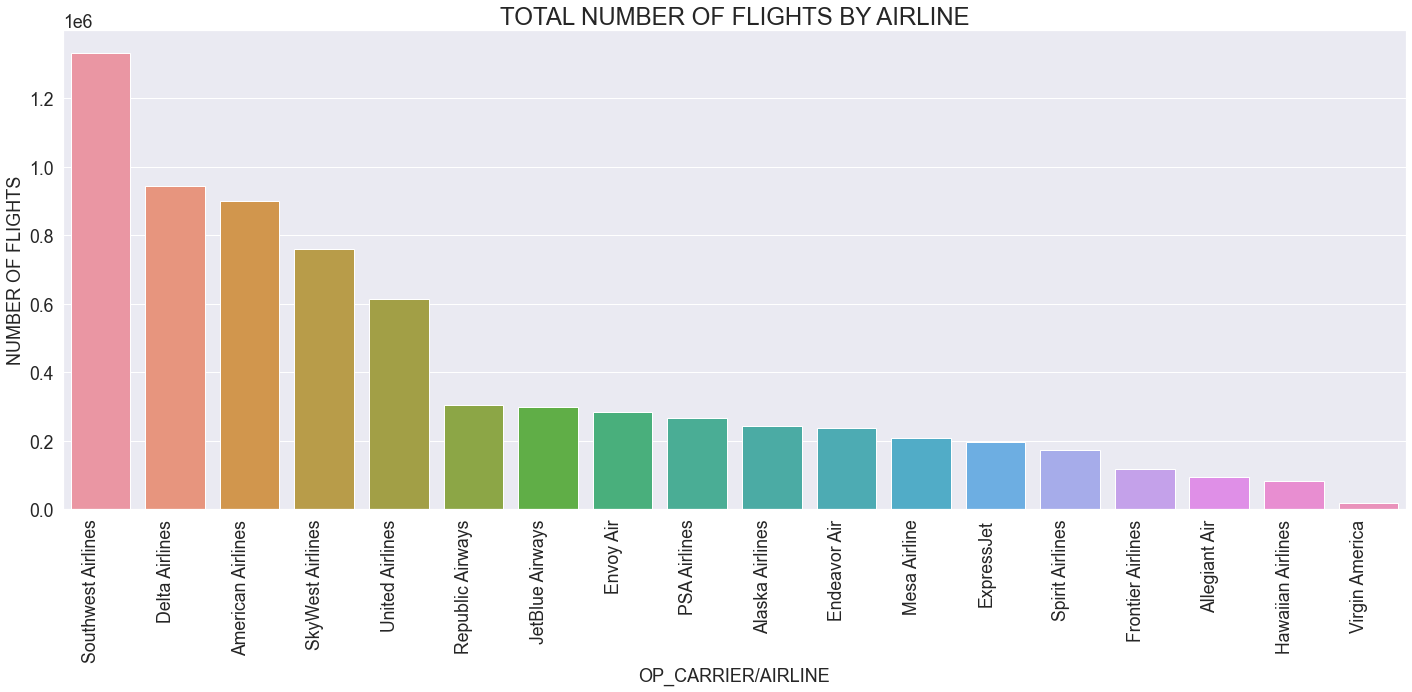

In [7]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.6)
axis = sns.countplot(x=df1['OP_CARRIER'], data=df1, order=df1['OP_CARRIER'].value_counts().iloc[0:18].index, orient="v")
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('TOTAL NUMBER OF FLIGHTS BY AIRLINE', fontsize=24)
plt.xlabel('OP_CARRIER/AIRLINE', fontsize=18)
plt.ylabel('NUMBER OF FLIGHTS', fontsize=18)
plt.tight_layout()
plt.show()

## Airlines
<b>1. Southwest Airlines</b><br>
<b>2. Delta Airlines</b><br>
<b>3. American Airlines</b><br> 
<b>4. SkyWest Airlines</b><br>
<b>5. United Airlines</b><br>

In [8]:
df1.OP_CARRIER.value_counts()

Southwest Airlines    1331609
Delta Airlines         943837
American Airlines      899527
SkyWest Airlines       760796
United Airlines        614915
Republic Airways       305251
JetBlue Airways        297758
Envoy Air              284497
PSA Airlines           265784
Alaska Airlines        242979
Endeavor Air           236403
Mesa Airline           209094
ExpressJet             196583
Spirit Airlines        174129
Frontier Airlines      117523
Allegiant Air           95192
Hawaiian Airlines       83375
Virgin America          17153
Name: OP_CARRIER, dtype: int64

## Number of Delayed Flights by Airline

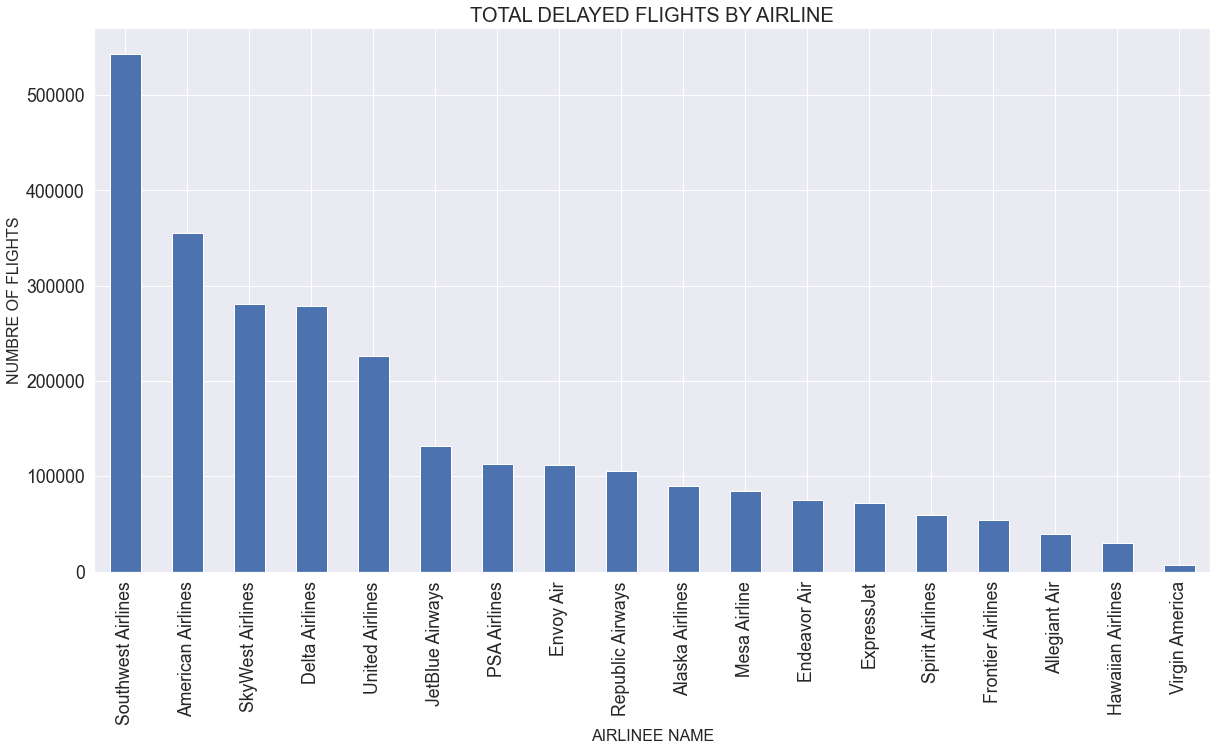

In [9]:
plt.figure(figsize=(20, 10))
df1.groupby('OP_CARRIER').FLIGHT_STATUS.sum().sort_values(ascending=False).plot.bar()
plt.title('TOTAL DELAYED FLIGHTS BY AIRLINE', fontsize=20)
plt.xlabel('AIRLINEE NAME', fontsize=16)
plt.ylabel('NUMBRE OF FLIGHTS', fontsize=16)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.show()

From this plot we can now extract the top 5 airlines with the most delayed flights, which are:<br>

<b>1. Southwest Airlines</b><br>
<b>2. American Airlines</b><br>
<b>3. SkyWest Airlines</b><br>
<b>4. Delta Airlines</b><br>
<b>5. United Airlines</b><br>


## Percentage of delayed flights per airline

In [10]:
df1.FLIGHT_STATUS.value_counts(normalize=True)

0    0.624772
1    0.375228
Name: FLIGHT_STATUS, dtype: float64

In [11]:
df1_PFD = df1[['OP_CARRIER', 'FLIGHT_STATUS']]
df1_PFD.head()

,OP_CARRIER,FLIGHT_STATUS
0,United Airlines,0
1,United Airlines,0
2,United Airlines,0
3,United Airlines,0
4,United Airlines,1


In [12]:
df1_PFD.shape

(7076405, 2)

In [13]:
# 3. Non-normalize value_count()
df1_PFD.FLIGHT_STATUS.value_counts()

0    4421139
1    2655266
Name: FLIGHT_STATUS, dtype: int64

In [14]:

test_1 = df1_PFD.groupby(['OP_CARRIER']).sum().reset_index()


test_2 = df1.OP_CARRIER.value_counts().rename_axis('OP_CARRIER').reset_index(name='TOTAL_FLIGHTS')

df_fp = pd.merge(test_1, test_2, on='OP_CARRIER')

df_fp['PERCENTAGE_DELAYED'] = round((df_fp['FLIGHT_STATUS']*100)/df_fp['TOTAL_FLIGHTS'], 2)
df_fp.rename({'FLIGHT_STATUS': 'DELAYED_FLIGHTS'}, axis=1, inplace=True)


df_fp.head(20)

,OP_CARRIER,DELAYED_FLIGHTS,TOTAL_FLIGHTS,PERCENTAGE_DELAYED
0,Alaska Airlines,89483,242979,36.83
1,Allegiant Air,39754,95192,41.76
2,American Airlines,355079,899527,39.47
3,Delta Airlines,278386,943837,29.50
4,Endeavor Air,74553,236403,31.54
5,Envoy Air,111435,284497,39.17
6,ExpressJet,71497,196583,36.37
7,Frontier Airlines,54203,117523,46.12
8,Hawaiian Airlines,30381,83375,36.44
9,JetBlue Airways,131673,297758,44.22


So there we have our dataframe alphabetically ordered with the three columns of our interest:<br>

* DELAYED_FLIGHTS<br>
* TOTAL_FLIGHTS<br>
* PERCENTAGE_DELAYED<br>

In [15]:
SUM = df_fp.DELAYED_FLIGHTS.sum()
print('Total number of delayed flights:', SUM)

Total number of delayed flights: 2655266


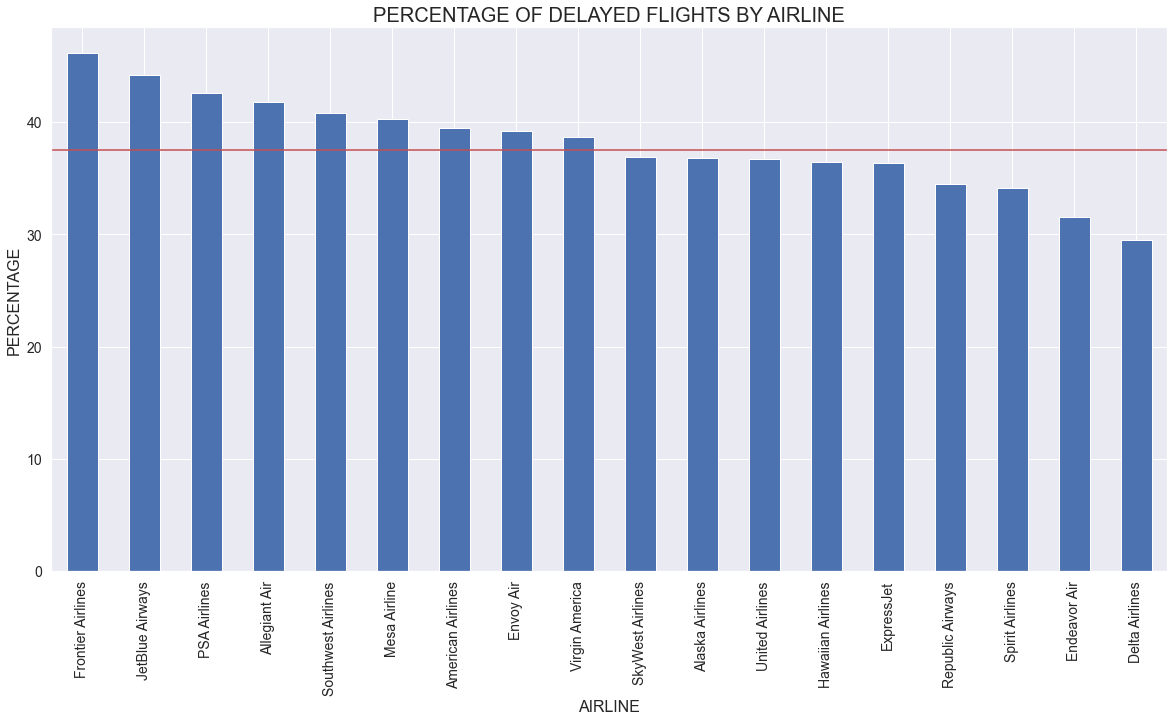

In [16]:
plt.figure(figsize=(20, 10))
df_fp.groupby('OP_CARRIER').PERCENTAGE_DELAYED.sum().sort_values(ascending=False).plot.bar(fontsize=14)
plt.hlines(y=37.52, xmin=-1, xmax=18, colors='r', linestyles='solid', label='cutoff')
plt.title('PERCENTAGE OF DELAYED FLIGHTS BY AIRLINE', fontsize=20)
plt.xlabel('AIRLINE', fontsize=16)
plt.ylabel('PERCENTAGE', fontsize=16)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
plt.show()

## Total Minutes Delayed by Airline

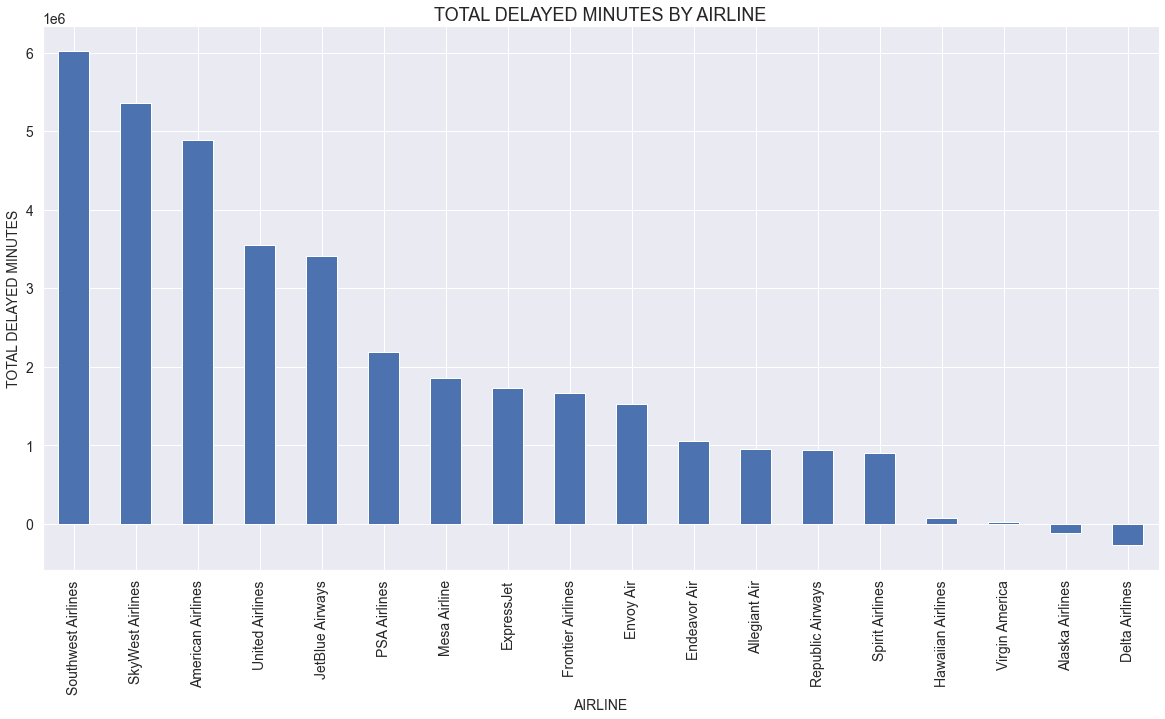

In [17]:
plt.figure(figsize=(20, 10))
df1.groupby('OP_CARRIER').ARR_DELAY.sum().sort_values(ascending=False).plot.bar()
plt.title('TOTAL DELAYED MINUTES BY AIRLINE', fontsize=18)
plt.xlabel('AIRLINE', fontsize=14)
plt.ylabel('TOTAL DELAYED MINUTES', fontsize=14)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.show()

## Average Delay Time per Airline

In [18]:
df1.head(2)

,FL_DATE,DAY,MONTH,MONTH_AB,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,FLIGHT_STATUS
0,2018-01-01,1,1,Jan,United Airlines,Newark,Denver,3,-5.0,15.0,3,3,10.0,3,-23.0,268.0,250.0,225.0,1605.0,0
1,2018-01-01,1,1,Jan,United Airlines,Las Vegas,San Francisco,2,-8.0,11.0,2,3,7.0,3,-24.0,99.0,83.0,65.0,414.0,0


In [19]:
test_3 = df1[['OP_CARRIER', 'ARR_DELAY']]
test_3 = test_3.groupby(['OP_CARRIER']).mean().reset_index()
test_3.rename({'ARR_DELAY': 'AVG_DELAY'}, axis=1, inplace=True)
test_3 = test_3.sort_values(['AVG_DELAY']).reset_index(drop=True)
test_3.head(18)

,OP_CARRIER,AVG_DELAY
0,Alaska Airlines,-0.501562
1,Delta Airlines,-0.289825
2,Hawaiian Airlines,0.851310
3,Virgin America,1.727978
4,Republic Airways,3.076668
5,Endeavor Air,4.452778
6,Southwest Airlines,4.519644
7,Spirit Airlines,5.171453
8,Envoy Air,5.357280
9,American Airlines,5.432065


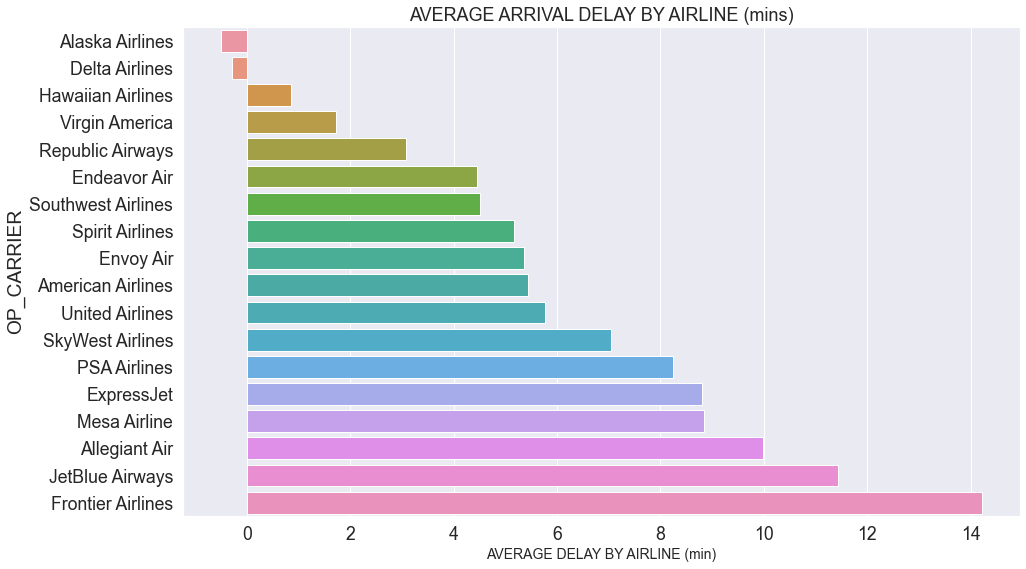

In [20]:
fig = plt.figure(1, figsize=(15,9))
sns.set(font_scale=1.6)
ax = sns.barplot(x='AVG_DELAY', y='OP_CARRIER', data=test_3)
ax.set_title('AVERAGE ARRIVAL DELAY BY AIRLINE (mins)', fontsize=18)
ax.set_xlabel('AVERAGE DELAY BY AIRLINE (min)', fontsize=14)
plt.show()

## 20 Most Common Destination (Cities)

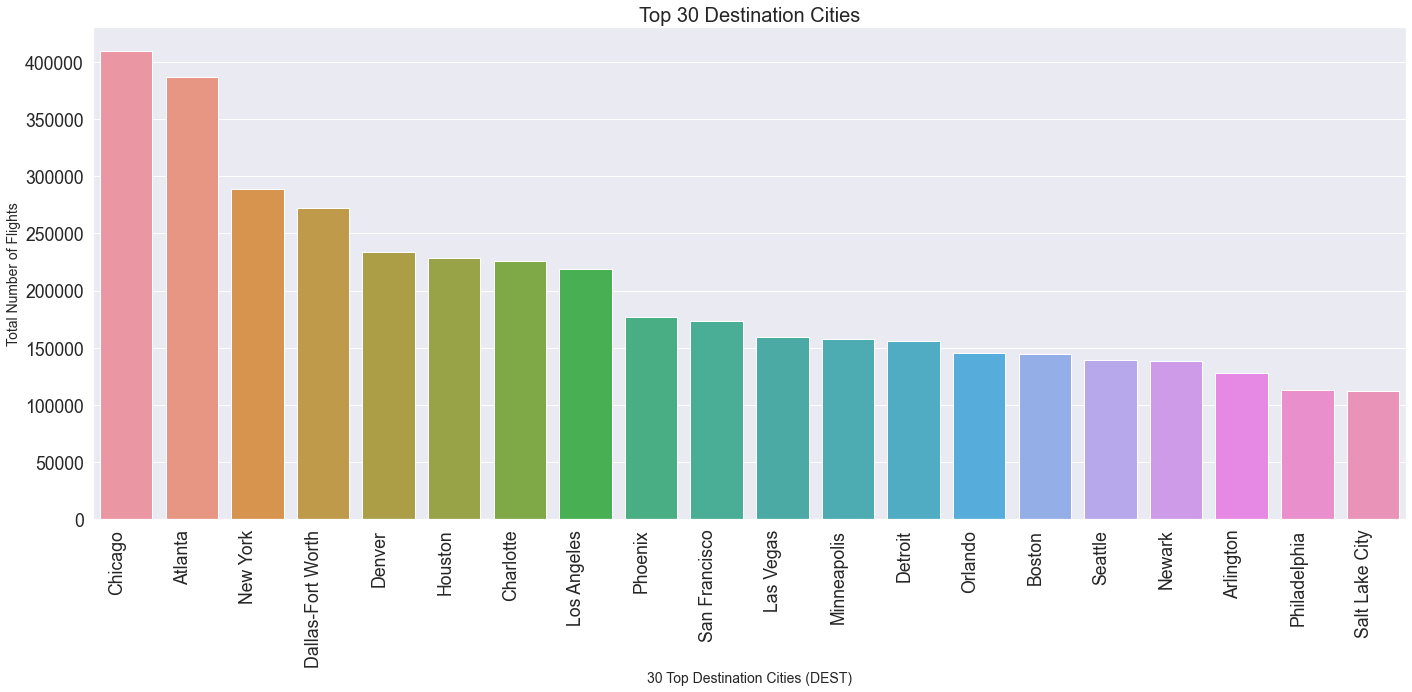

In [21]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.6)
axis = sns.countplot(x=df1['DEST'], data=df1, order=df1['DEST'].value_counts().iloc[0:20].index)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('Top 30 Destination Cities', fontsize=20)
plt.xlabel('30 Top Destination Cities (DEST)', fontsize=14)
plt.ylabel('Total Number of Flights', fontsize=14)
plt.tight_layout()
plt.show()

## Worse & Best months to travel based on flight delays

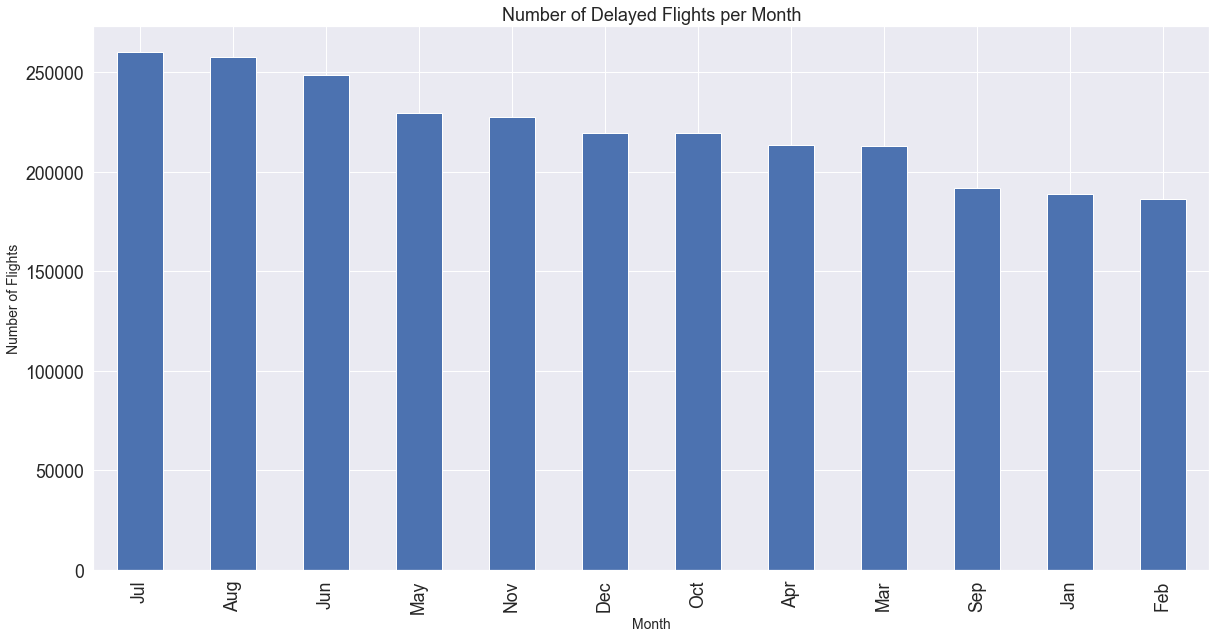

In [22]:
plt.figure(figsize=(20, 10))
df1.groupby('MONTH_AB').FLIGHT_STATUS.sum().sort_values(ascending=False).plot.bar()
plt.title('Number of Delayed Flights per Month', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)
plt.show()

- Figure shows the months with the most delayed flights are July, August, June and May, (summer months). 
- Followed by November, December and October(Christmas/holiday season). 
- The best months to travel are February, January and September? 

## Better day to travel?

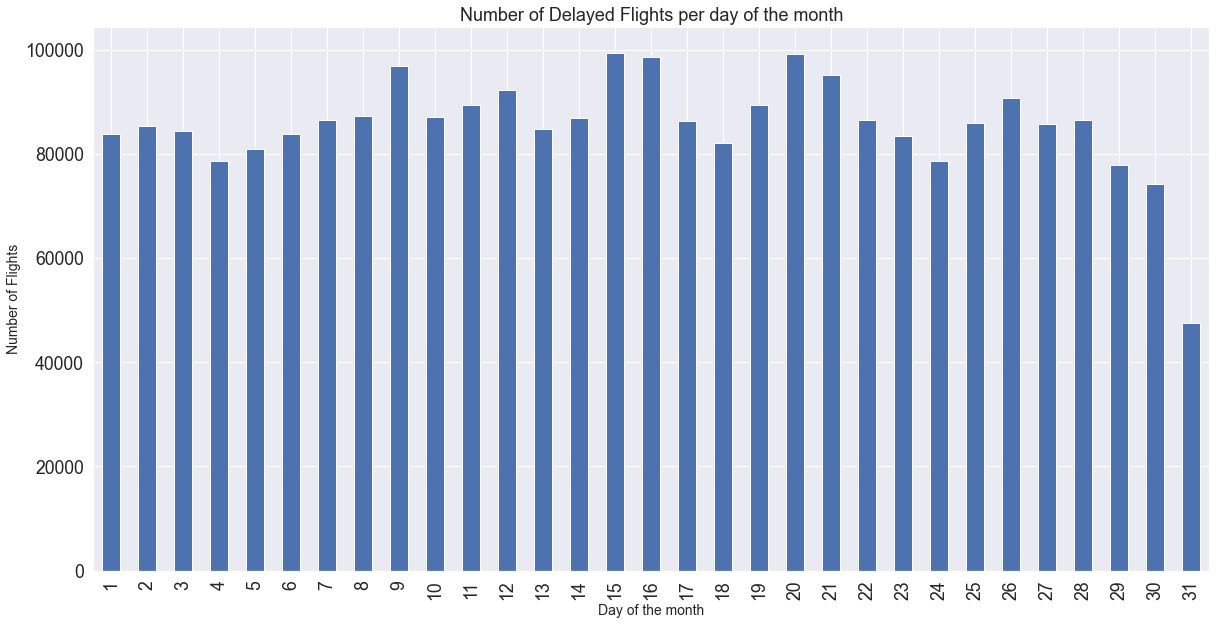

In [23]:
plt.figure(figsize=(20, 10))
df1.groupby('DAY').FLIGHT_STATUS.sum().plot.bar()
plt.title('Number of Delayed Flights per day of the month', fontsize=18)
plt.xlabel('Day of the month', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)
plt.show()

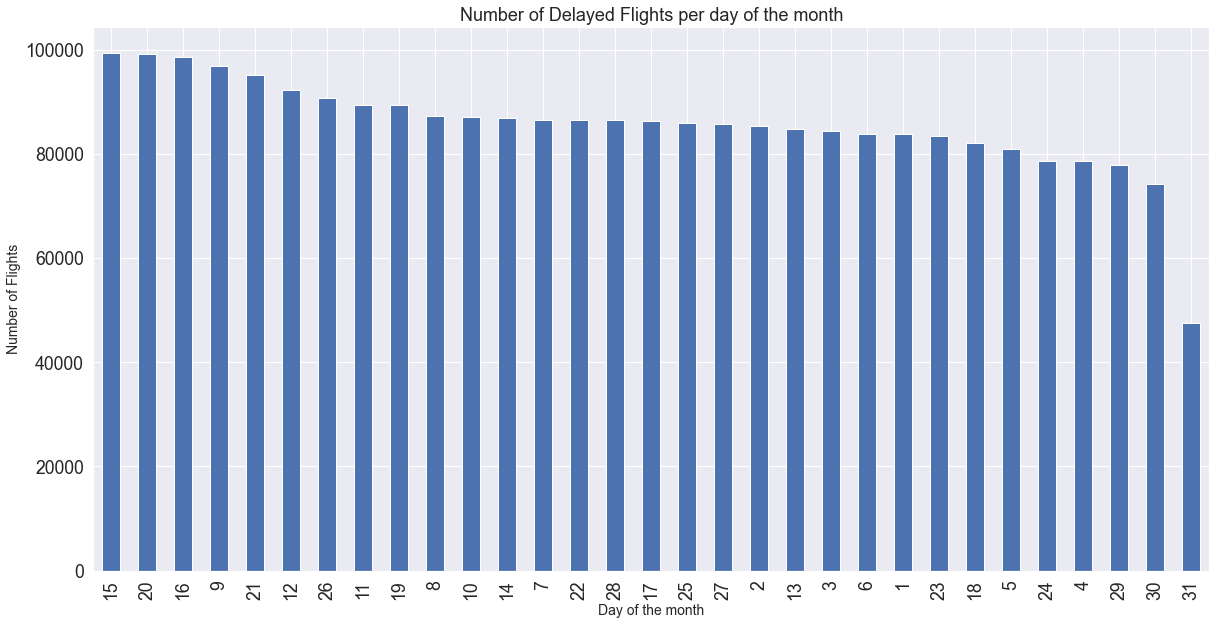

In [24]:
plt.figure(figsize=(20, 10))
barplot =df1.groupby('DAY').FLIGHT_STATUS.sum().sort_values(ascending=False).plot.bar()
plt.title('Number of Delayed Flights per day of the month', fontsize=18)
plt.xlabel('Day of the month', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)
plt.show()

No conclusion 

## Departure vs. Arrival Delay

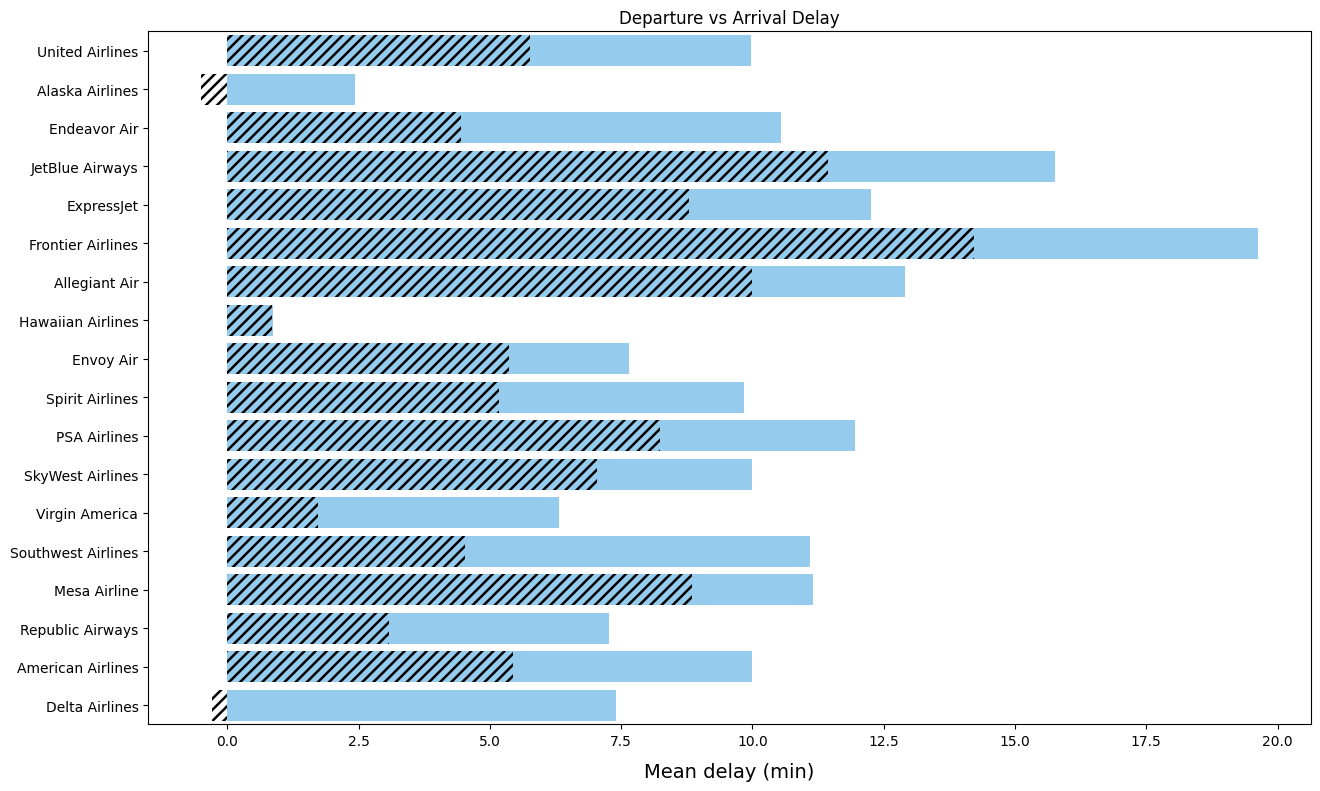

In [25]:
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['hatch.linewidth'] = 1.8  

fig = plt.figure(1, figsize=(15,9))
ax = sns.barplot(x="DEP_DELAY", y="OP_CARRIER", data=df1, color="lightskyblue", ci=None)
ax = sns.barplot(x="ARR_DELAY", y="OP_CARRIER", data=df1, color="r", hatch = '///', alpha = 0.0, ci=None)
ax.yaxis.label.set_visible(False)
plt.title('Departure vs Arrival Delay')
plt.xlabel('Mean delay (min)', fontsize=14, labelpad=10);

- The departure delay (DEP_DELAY) is the light blue color, whereas the arrival delay (ARR_DELAY) is the dashed line.

- The results of the plot shows that the arrival delay are generally lower than the departure delay, suggesting that the airlines try to adjust their flight speed to try and compensate for the late departure and reduce the arrival delay. 

- Delta airlines arrivals are negative. This means that even when they leave late, they try to reduce the time of the flights to arrive on time or earlier.

In [26]:
df1_LA = df1[(df1['ARR_DELAY'] >= 15)]

In [27]:
df1.shape

(7076405, 20)

In [28]:
df1_LA.shape

(1352710, 20)

In [29]:
df1_LD = df1[(df1['DEP_DELAY'] > 15)]
df1_LD.shape

(1254942, 20)

In [30]:
df1_LD.DEP_DELAY.describe()

count    1.254942e+06
mean     6.800904e+01
std      8.348196e+01
min      1.600000e+01
25%      2.500000e+01
50%      4.200000e+01
75%      8.000000e+01
max      2.710000e+03
Name: DEP_DELAY, dtype: float64

## Most Popular Destination with Average Arrival Delays

In [31]:
df1.head()

,FL_DATE,DAY,MONTH,MONTH_AB,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,FLIGHT_STATUS
0,2018-01-01,1,1,Jan,United Airlines,Newark,Denver,3,-5.0,15.0,3,3,10.0,3,-23.0,268.0,250.0,225.0,1605.0,0
1,2018-01-01,1,1,Jan,United Airlines,Las Vegas,San Francisco,2,-8.0,11.0,2,3,7.0,3,-24.0,99.0,83.0,65.0,414.0,0
2,2018-01-01,1,1,Jan,United Airlines,Santa Ana,Denver,3,-5.0,15.0,3,3,5.0,3,-13.0,134.0,126.0,106.0,846.0,0
3,2018-01-01,1,1,Jan,United Airlines,Ft. Myers,Chicago,3,6.0,19.0,3,3,6.0,3,-2.0,190.0,182.0,157.0,1120.0,0
4,2018-01-01,1,1,Jan,United Airlines,Chicago,Albany,2,20.0,13.0,2,2,10.0,2,14.0,112.0,106.0,83.0,723.0,1


In [32]:
test_4 = df1[['DEST', 'ARR_DELAY']]
test_4 = test_4.groupby(['DEST']).mean().reset_index()
test_4.head(10)

,DEST,ARR_DELAY
0,Aberdeen,3.716621
1,Abilene,5.784016
2,Adak,-6.079208
3,Agana,4.039088
4,Aguadilla,14.286742
5,Akron,13.740124
6,Albany,6.844120
7,Albuquerque,5.599697
8,Alexandria,3.554924
9,Allentown,5.558260


In [33]:
test_4.shape

(342, 2)

In [34]:
test_5 = df1.DEST.value_counts().rename_axis('DEST').reset_index(name='FLIGHTS').iloc[0:30]
test_5.head(30)

,DEST,FLIGHTS
0,Chicago,409732
1,Atlanta,386390
2,New York,288598
3,Dallas-Fort Worth,272147
4,Denver,233411
5,Houston,228072
6,Charlotte,226110
7,Los Angeles,219261
8,Phoenix,177171
9,San Francisco,173016


In [35]:
test_4_5 = pd.merge(test_5, test_4, on='DEST')
test_4_5.head()

,DEST,FLIGHTS,ARR_DELAY
0,Chicago,409732,7.135720
1,Atlanta,386390,2.913906
2,New York,288598,8.483590
3,Dallas-Fort Worth,272147,6.313114
4,Denver,233411,3.132397


In [36]:
test_4_5.describe()

,FLIGHTS,ARR_DELAY
count,30.000000,30.000000
mean,160272.033333,4.907625
std,89733.730942,3.195990
min,65186.000000,0.665390
25%,91315.750000,2.943665
50%,141545.000000,4.357781
75%,208738.500000,6.272611
max,409732.000000,16.652241


--------------


# Exploratory Data Analysis 2 sentiment analysis


-----

In [4]:
df = pd.read_csv("Tweets.csv")

In [5]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# https://www.kaggle.com/parthsharma5795/comprehensive-twitter-airline-sentiment-analysis
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# import os
# print(os.listdir("input"))
import re
import nltk
from nltk.corpus import stopwords

In [11]:
((df.isnull() | df.isna()).sum() * 100 / df.index.size).round(2)

tweet_id                         0.00
airline_sentiment                0.00
airline_sentiment_confidence     0.00
negativereason                  37.31
negativereason_confidence       28.13
airline                          0.00
airline_sentiment_gold          99.73
name                             0.00
negativereason_gold             99.78
retweet_count                    0.00
text                             0.00
tweet_coord                     93.04
tweet_created                    0.00
tweet_location                  32.33
user_timezone                   32.92
dtype: float64

In [12]:
del df['tweet_coord']
del df['airline_sentiment_gold']
del df['negativereason_gold']
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


Total number of tweets for each airline 
  airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline_sentiment, dtype: int64


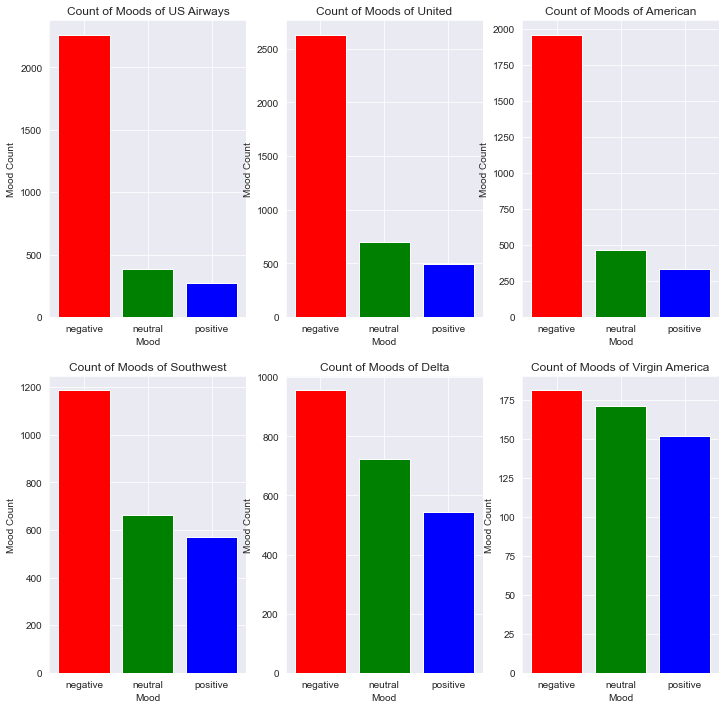

In [13]:
print("Total number of tweets for each airline \n ",df.groupby('airline')['airline_sentiment'].count().sort_values(ascending=False))
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']
plt.figure(1,figsize=(12, 12))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    new_df=df[df['airline']==i]
    count=new_df['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,count, color=['red', 'green', 'blue'])
    plt.xticks(Index,['negative','neutral','positive'])
    plt.ylabel('Mood Count')
    plt.xlabel('Mood')
    plt.title('Count of Moods of '+i)

In [16]:
from wordcloud import WordCloud,STOPWORDS

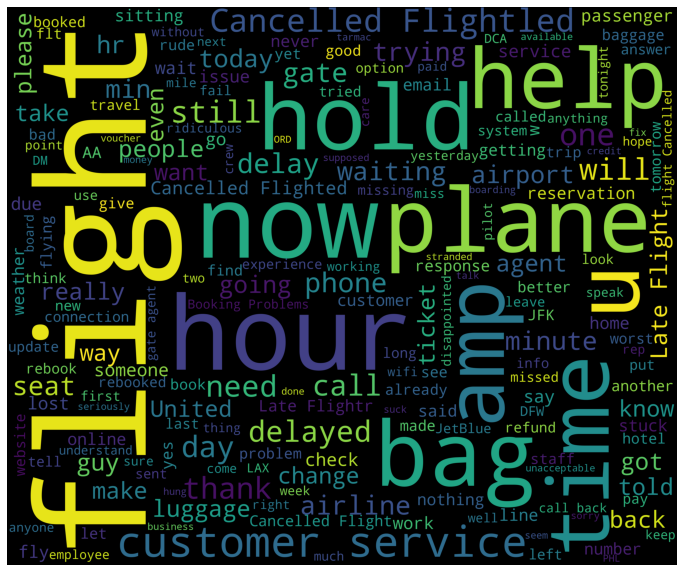

In [17]:
new_df=df[df['airline_sentiment']=='negative']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

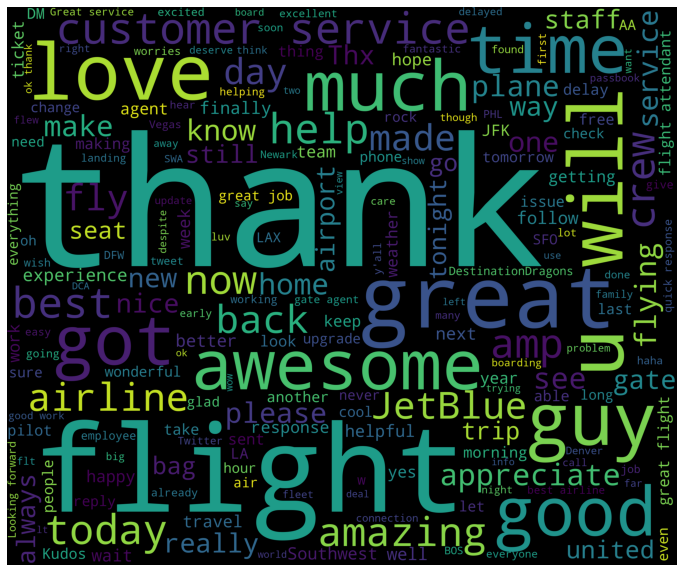

In [18]:
new_df=df[df['airline_sentiment']=='positive']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

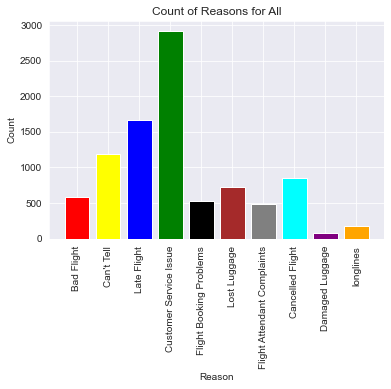

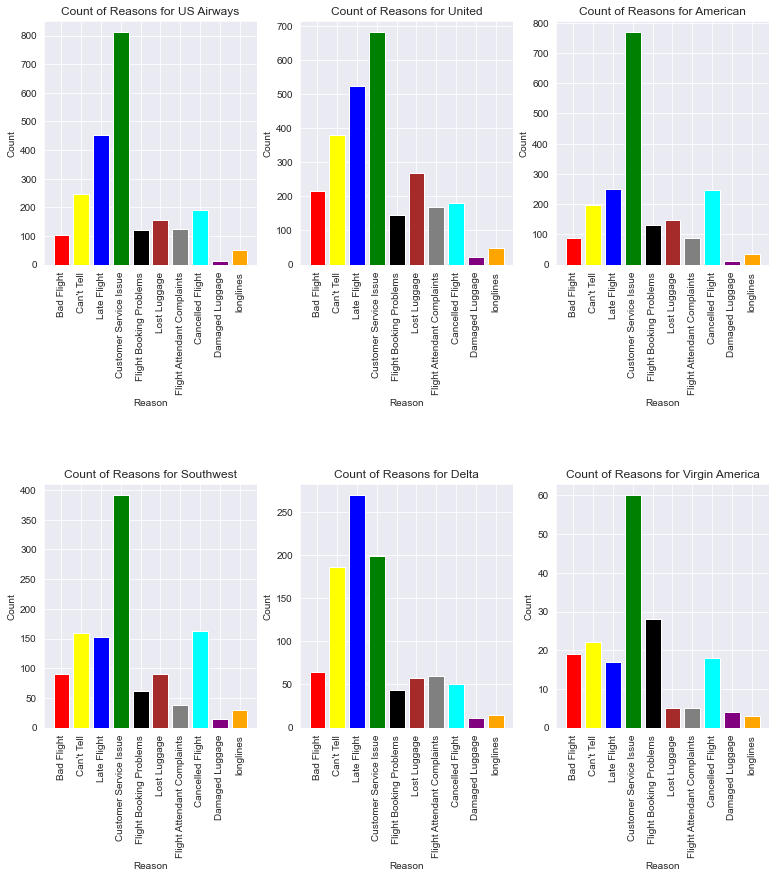

In [19]:
df['negativereason'].nunique()

NR_Count=dict(df['negativereason'].value_counts(sort=False))
def NR_Count(Airline):
    if Airline=='All':
        a=df
    else:
        a=df[df['airline']==Airline]
    count=dict(a['negativereason'].value_counts())
    Unique_reason=list(df['negativereason'].unique())
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame
def plot_reason(Airline):
    
    a=NR_Count(Airline)
    count=a['count']
    Index = range(1,(len(a)+1))
    plt.bar(Index,count, color=['red','yellow','blue','green','black','brown','gray','cyan','purple','orange'])
    plt.xticks(Index,a['Reasons'],rotation=90)
    plt.ylabel('Count')
    plt.xlabel('Reason')
    plt.title('Count of Reasons for '+Airline)
    
plot_reason('All')
plt.figure(2,figsize=(13, 13))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    plt.subplots_adjust(hspace=0.9)
    plot_reason(i)